## Importing important libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Load Datasets

In [64]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
777,Female,29.081070,1.674568,71.602622,yes,yes,2.000000,3.000000,Sometimes,no,1.701835,no,1.682271,0.000000,Sometimes,Automobile,Overweight_Level_I
1397,Female,22.877950,1.669130,86.002736,yes,yes,2.290095,2.590283,Sometimes,no,2.506296,no,0.312254,1.000000,no,Public_Transportation,Obesity_Type_I
1920,Female,25.919571,1.610488,102.174953,yes,yes,3.000000,3.000000,Sometimes,no,1.032834,no,0.045250,0.922749,Sometimes,Public_Transportation,Obesity_Type_III
591,Male,19.556729,1.767563,56.307019,yes,yes,2.362918,4.000000,Sometimes,no,2.358172,no,2.000000,0.939819,no,Automobile,Insufficient_Weight
723,Female,18.281092,1.700000,50.000000,no,yes,1.036414,3.205587,Sometimes,no,1.745959,no,0.115974,1.000000,Sometimes,Public_Transportation,Insufficient_Weight


## Exploratory Data Analysis

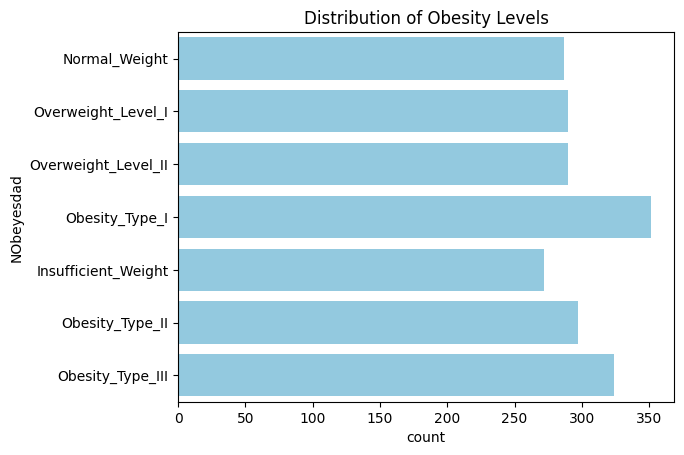

In [65]:
sns.countplot(data=data, y='NObeyesdad', color='skyblue')
plt.title('Distribution of Obesity Levels')
plt.show()

## Checking data information and describe data

In [66]:
print(f'List of Null data: \n{data.isna().sum()}')
print(f'Data Information: \n{data.info()}')
print(f'Describe Data: \n{data.describe()}')

List of Null data: 
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2  

## Preprocessing Data

In [72]:
# Standardizing continuous numerical features
continuous_columns = data.select_dtypes(include='float64').columns.to_list()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Converting to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

## One-hot Encoding

In [73]:
# Identifying categorical columns
categorical_columns = data.select_dtypes(include='object').columns.to_list()
categorical_columns.remove('NObeyesdad')

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Combining encoded categorical features with the original dataset
encoded_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
encoded_data


,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Normal_Weight,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Normal_Weight,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Overweight_Level_I,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Overweight_Level_II,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Obesity_Type_III,-0.525774,0.097045,1.711763,1.088342,0.404153,-0.456705,0.783135,0.407996,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2107,Obesity_Type_III,-0.367195,0.502844,1.800914,1.088342,0.404153,-0.004702,0.389341,-0.096251,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2108,Obesity_Type_III,-0.281909,0.541672,1.798868,1.088342,0.404153,0.075361,0.474971,-0.019018,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2109,Obesity_Type_III,0.007776,0.404927,1.785780,1.088342,0.404153,1.377801,0.151471,-0.117991,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Encode the target variable
* As `NObeyesdad` is still in string format, we have encode this to numeric format for training

In [80]:
encoded_data['NObeyesdad'] = encoded_data['NObeyesdad'].astype('category').cat.codes
encoded_data.sample(5)

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
1268,2,-0.994977,1.272558,0.832880,-0.785019,-0.669520,0.141101,-0.012109,0.030702,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1736,3,0.376189,1.482200,1.274418,-0.326694,0.404153,1.285460,-0.200868,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
463,1,-1.152595,1.054029,-0.709799,-0.785019,0.404153,-1.644905,1.163820,0.561997,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1524,3,0.186958,1.971058,1.323929,-0.019637,0.404153,1.377091,0.364265,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1898,4,-0.762934,0.987821,2.839388,1.088342,0.404153,0.099943,1.148117,0.475087,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Separating X and y data from final dataset

In [85]:
X = encoded_data.drop('NObeyesdad', axis=1)
y = encoded_data.NObeyesdad

## Splitting training and testing sets

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression with One-vs-All

In [91]:
model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ovr.fit(X_train, y_train)

# Predicting model
y_pred_ovr = model_ovr.predict(X_test)
y_pred_ovr[:5]

array([0, 0, 5, 4, 3], dtype=int8)

**Evaluating the metrics for `One Vs Rest` or `One Vs All` strategy**

In [98]:
print("One-vs-All (OvA) Strategy")
metrics_ovr = np.round(100*accuracy_score(y_test, y_pred_ovr), 3)
print(f'Accuracy: {metrics_ovr}%')

One-vs-All (OvA) Strategy
Accuracy: 76.123%


## LogisticRegression One Vs One
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in `k(k-1)/2` classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.


In [90]:
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

# Lets make prediction using ovo algorithm
y_pred_ovo = model_ovo.predict(X_test)
y_pred_ovo[:5]

array([0, 0, 6, 4, 3], dtype=int8)

**Evaluating metrics for `One Vs One` strategy**

In [99]:
metrics_ovo = np.round(100*accuracy_score(y_test, y_pred_ovo), 3)
print("One-vs-One (OvO) Strategy")
print(f'Accuracy: {metrics_ovo}%')

One-vs-One (OvO) Strategy
Accuracy: 92.199%


## Let's check for different `test_size`

**Let's create a function for `one-vs-rest`**

In [120]:
def model_building_ovr(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    model = LogisticRegression(multi_class='ovr', max_iter = 1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy for one-vs-rest: {accuracy_score(y_test, y_pred)*100:.3f}%')

**Let's create another function for `one-vs-one`**

In [121]:
def model_building_ovo(X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy for one-vs-one: {np.round(accuracy_score(y_test, y_pred)*100, 3)}%')

In [119]:
# For test_size=0.1 and one-vs-rest strategy
model_building_ovr(X, y, 0.1)
# For test_size=0.1 and one-vs-one strategy
model_building_ovo(X, y, 0.1)

Accuracy for one-vs-rest: 75.943%
Accuracy for one-vs-one: 90.566%


## Let's try another approach

In [126]:
def model_building_combined():
    for test_size in [0.1, 0.3]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
        model_ovr_1 = LogisticRegression(multi_class='ovr', max_iter=1000)
        model_ovr_1.fit(X_train, y_train)
        
        y_pred_ovr_1 = model_ovr_1.predict(X_test)
        print(f'Accuracy for {test_size} and one-vs-rest: {np.round(100*accuracy_score(y_test, y_pred_ovr_1), 3)}%')
    
    for test_size in [0.1, 0.3]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
        model_ovr_2 = OneVsOneClassifier(LogisticRegression(max_iter=1000))
        model_ovr_2.fit(X_train, y_train)
        
        y_pred_ovr_2 = model_ovr_2.predict(X_test)
        print(f'Accuracy for {test_size} and one-vs-one: {np.round(100*accuracy_score(y_test, y_pred_ovr_2), 3)}%')

In [127]:
model_building_combined()

Accuracy for 0.1 and one-vs-rest: 75.943%
Accuracy for 0.3 and one-vs-rest: 74.921%
Accuracy for 0.1 and one-vs-one: 90.566%
Accuracy for 0.3 and one-vs-one: 90.852%


**Plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model**

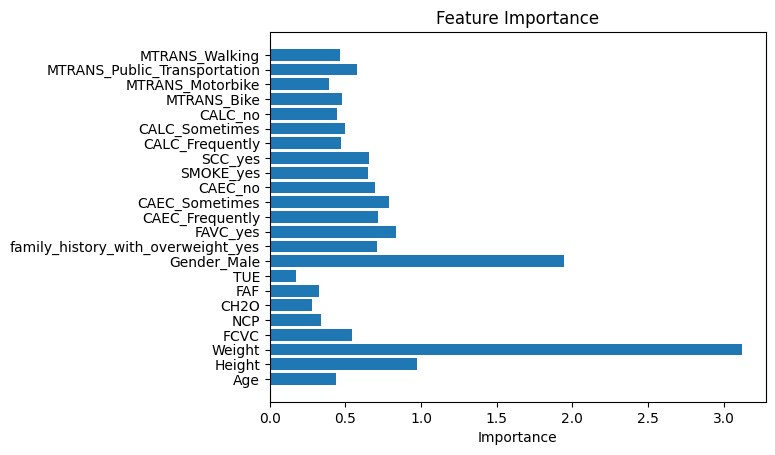

In [147]:
feature_importance_ovr = np.mean(np.abs(model_ovr.coef_), axis=0)
plt.barh(X.columns, feature_importance_ovr)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

**Plot a bar chart of feature importance using the coefficients from the One vs One logistic regression model**
* `OneVsOneClassifier` do not directly have `coef_` method. So we have to get it from `estimators_` using some methods

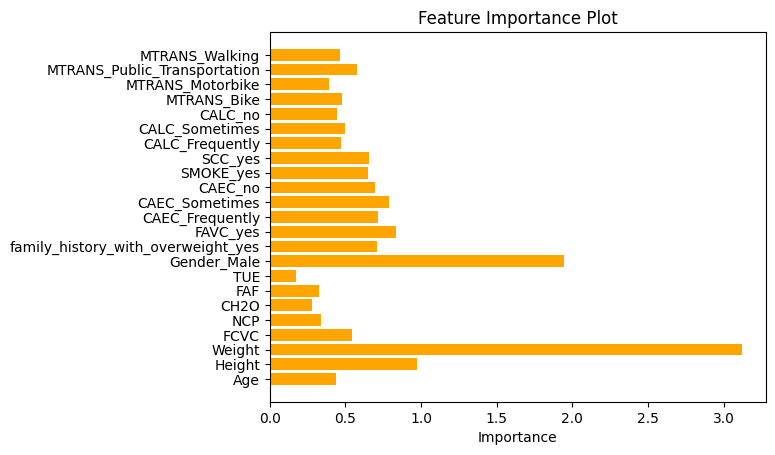

In [159]:
coefs = [est.coef_.flatten() for est in model_ovo.estimators_]
coefs_array = np.array(coefs)
feature_importance_ovo = np.mean(np.abs(coefs), axis=0)
plt.barh(X.columns, feature_importance_ovr, color='orange')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.show()

## Creating a function for whole process (Single Function)

In [160]:
# write your function here and then execute this cell
def obesity_risk_pipeline(data_path, test_size):
    df = pd.read_csv(data_path)

    # Standardize numerical columns
    numerical_features = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, (int, float))).all()]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[numerical_features])

    # DataFrame of Scaled Features
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(numerical_features))

    # Integrate with the original dataset
    scaled_data = pd.concat([df.drop(columns=numerical_features), scaled_df], axis=1)

    # Convert Categorical Features in numeric using OneHotEncoder
    categorical_features = []
    for label, content in scaled_data.items():
        if not pd.api.types.is_numeric_dtype(content):
            categorical_features.append(label)

    categorical_features.remove('NObeyesdad')
    one_hot = OneHotEncoder(drop='first', sparse_output=False)
    encoded_features = one_hot.fit_transform(scaled_data[categorical_features])

    # Create DataFrame from encoded features
    encoded_df = pd.DataFrame(encoded_features, columns=one_hot.get_feature_names_out(categorical_features))

    # Integrate with the original Data Set
    encoded_data = pd.concat([scaled_data.drop(columns=categorical_features), encoded_df], axis=1)

    # Lets convert target feature into numeric type
    encoded_data['NObeyesdad'] = encoded_data['NObeyesdad'].astype('category').cat.codes

    # Separate data in X and y
    X = encoded_data.drop('NObeyesdad', axis=1)
    y = encoded_data['NObeyesdad']

    # Splititng in training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=42, stratify=y)

    # Model cbuilding and training data for OneVsRest strategy
    model_1vr = LogisticRegression(multi_class='ovr', max_iter=1000)
    model_1vr.fit(X_train, y_train)

    y_pred_1vr = model_1vr.predict(X_test)

    # Evaluating Function using accuracy score
    print(f'Accuracy Score for one-vs-rest: {np.round(100*accuracy_score(y_test, y_pred_1vr), 2)}%')

    # Model building for OneVsOne strategy
    model_1v1 = OneVsOneClassifier(LogisticRegression(max_iter=1000))
    model_1v1.fit(X_train, y_train)

    y_pred_1v1 = model_1v1.predict(X_test)

    # Evaluating function using accuracy score
    print(f'Accuracy Score for One-Vs-One: {100*accuracy_score(y_test, y_pred_1v1):.2f}%')

obesity_risk_pipeline(file_path, test_size=0.2)

Accuracy Score for one-vs-rest: 76.12%
Accuracy Score for One-Vs-One: 92.20%
